# Chapter 02. 데이터 다루기

## 02-1. 훈련 세트와 테스트 세트

* 지도 학습: 입력과 타깃으로 이루어진 훈련 데이터가 존재, 정답이 존재하여 알고리즘이 정답을 맞히는 것을 학습함
* 비지도 학습: 타깃 없이 입력된 데이터의 성질 등을 분류, 데이터를 잘 이해하는 데 도움을 줌


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target=[1]*35 + [0]*14

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

## 샘플링 편향

* 훈련 세트와 테스트 세트가 골고루 섞이지 않고 한쪽으로 편향된 경우
* Numpy 모듈로 랜덤하게 훈련 세트와 테스트 세트를 만들 수 있음

In [5]:
import numpy as np
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

np.random.seed(42) # 랜덤시드 지정은 시도마다 다른 값이 나오는 것을 방지하는 역할을 함
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]


test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

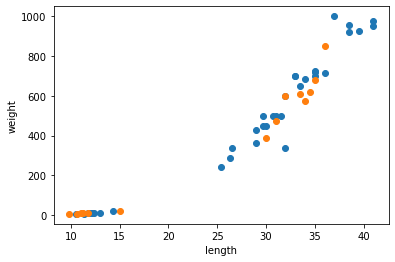

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [9]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [10]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 02-2. 데이터 전처리

* 데이터의 스케일링에 오류가 있으면 k-최근접 알고리즘 등을 사용할 때 오류가 발생할 수 있음
* 해결책: Z-score 등 정규화 과정 필요

### p.90 그림

* `np.column_stack()`: 주어진 배열을 Transpose 하여 우측으로 붙여 나가는 것
* `np.concatenate()`: 주어진 배열을 기존 차원을 따라 연결하는 것
* 연결할 리스트는 Python 튜플로 전달


In [12]:
fish_data=np.column_stack((fish_length, fish_weight))
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

### 문제점 발생

* [25,150]을 잘못 예측한다는 단점 확인

### p.92 사이킷런에서의 train_test_spilt

* `train_test_split`은 25%를 테스트 세트로 떼어냄 (default)
* 분류되는 과정에서 input과 target의 index는 동일하게 유지되겠지?
* `stratify`: 클래스 비율이 일정하도록 fish_target을 지정해 줌

In [15]:
print(kn.predict([[25,150]]))

[0.]


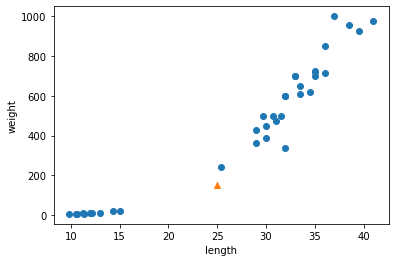

In [16]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
distances,indexes=kn.kneighbors([[25,150]])

In [21]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

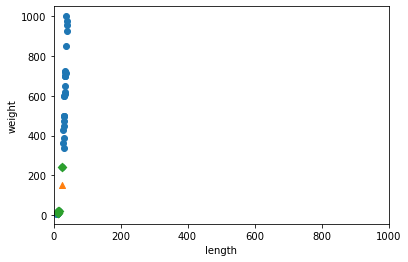

In [22]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 문제점 발생

* [25,150]을 잘못 예측한다는 단점 확인
* 스케일링 오류: 모든 알고리즘이 거리 기반인 건 아니지만, KNeighborsClassifier에서 kneighbors()로 거리와 이웃 샘플 인덱스를 저장하고 있는 것을 확인할 수 있음. 이 알고리즘은 거리가 중요한 요소인데, 여기서는 특성 간에 Scaling이 되지 않은 상태라 문제.

### 표준점수(Standard Score)

* Z점수 구하는 공식 그대로 대입
* 브로드캐스팅(Broadcasting): 넘파이 배열 사이에서 전체 행과 열에 대해 평균 빼 주고, 표준편차 나눠 주는 것과 같은 기능

In [23]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

train_scaled=(train_input - mean)/std
test_scaled=(test_input-mean)/std
new = ([25,150]-mean)/std

kn.fit(train_scaled,train_target)
kn.score(test_scaled,test_target)

1.0

In [24]:
kn.predict([new])

array([1.])

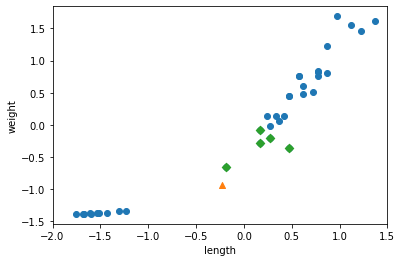

In [33]:
distances,indexes=kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlim((-2,1.5))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()